In [28]:
from sys import path
from pydub import AudioSegment

# files                                                                         
src = path[0] + "\\files\\voice2.ogg"
dst = path[0] + "\\files\\test.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_ogg(src)
sound.export(dst, format="wav")

<_io.BufferedRandom name='c:\\+Code\\Ai Quera\\Signal\\Audio FFT\\files\\test.wav'>

In [29]:
from scipy.io import wavfile
import sys
import playsound

dir = sys.path[0] + "\\files\\"
# file = dir + "crow.wav"
# file = dir + "piano.wav"
file = dir + "test.wav"
sample_rate, data = wavfile.read(file)
playsound.playsound(file)


(0.0, 20.0)

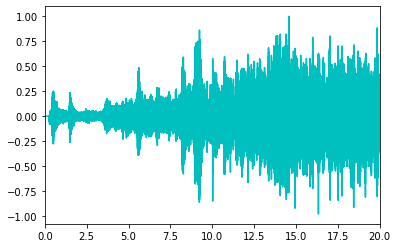

In [30]:
import matplotlib.pyplot as plt
import numpy as np

signal = data
max_signal = max(max(signal),abs(min(signal)))
normal_signal = signal / max_signal
length = data.shape[0] / sample_rate
sample_dens = np.linspace(0, length, data.shape[0])

plt.plot(sample_dens, normal_signal, color="c")
plt.xlim(0, length)


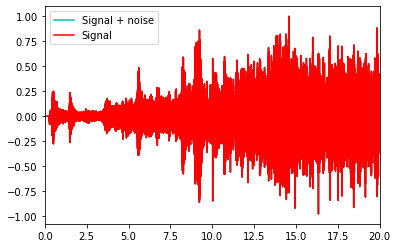

In [31]:
noise = np.random.randn(signal.shape[0]) 
# print(normal_noise)
normal_noise = noise / (min(max(noise),max(normal_signal)))
# signal_noisy = normal_signal + normal_noise
signal_noisy = normal_signal 


plt.plot(sample_dens, signal_noisy, color="c")
plt.plot(sample_dens, normal_signal, color="r")
plt.xlim(0, length)
plt.legend(["Signal + noise","Signal"])

In [23]:
raise_volume = signal_noisy * max_signal
wavfile.write(dir + "noisy.wav", sample_rate, raise_volume.astype(data.dtype))
playsound.playsound(dir + "noisy.wav" )

[     1      2      3 ... 479997 479998 479999]


c:\+Code\Ai Quera\env_ai\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Power')

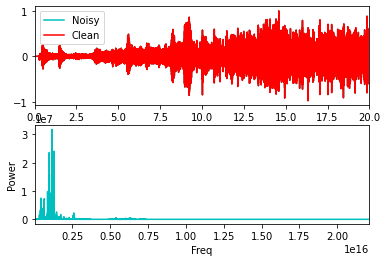

In [32]:
import numpy as np

dt = sample_dens[1]

fhat = np.fft.fft(signal_noisy)
PSD = fhat * np.conj(fhat) 
max_power = max(PSD)
# PSD /= max_power
freq = (1/dt*signal.shape[0]) * np.arange(signal.shape[0])
L = np.arange(1,np.floor(signal.shape[0]/2),dtype='int')
print(L)
fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(sample_dens,signal_noisy,color='c')
plt.plot(sample_dens,normal_signal,color='r')
plt.xlim(sample_dens[0],sample_dens[-1])
plt.legend(["Noisy","Clean"])

plt.sca(axs[1])
plt.plot(freq[L], PSD[L],color='c')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.xlabel(xlabel="Freq")
plt.ylabel(ylabel="Power")

c:\+Code\Ai Quera\env_ai\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\+Code\Ai Quera\env_ai\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\+Code\Ai Quera\env_ai\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


c:\+Code\Ai Quera\env_ai\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


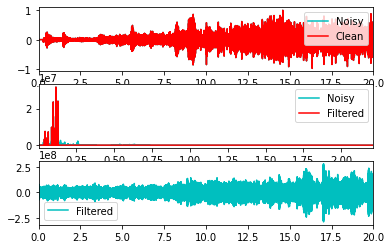

In [37]:
indices = (PSD > (max_power * 0.1))
PSDclean = PSD * indices
new_fhat = indices * fhat * max_signal
ffilt = np.fft.ifft(new_fhat)

fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(sample_dens,signal_noisy,color='c')
plt.plot(sample_dens,normal_signal,color='r')
plt.xlim(sample_dens[0],sample_dens[-1])
plt.legend(["Noisy","Clean"])

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c')
plt.plot(freq[L],PSDclean[L],color='r')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend(["Noisy","Filtered"])

plt.sca(axs[2])
plt.plot(sample_dens,ffilt,color='c')
plt.xlim(sample_dens[0],sample_dens[-1])
plt.legend(["Filtered"])


In [36]:
wavfile.write(dir + "denoisd.wav", sample_rate, ffilt.astype(data.dtype))
playsound.playsound(dir + "denoisd.wav")

<ipython-input-36-28211701f921>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  wavfile.write(dir + "denoisd.wav", sample_rate, ffilt.astype(data.dtype))
